In [1]:
import numpy as np
import pandas as pd
import urllib.request
import io
from io import StringIO
import requests
from datetime import datetime, date, timedelta
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.dates as mdates
from statsmodels.nonparametric.smoothers_lowess import lowess
from pprint import pprint

# Get data from USAfacts.org

In [2]:
# first get deaths
url="https://static.usafacts.org/public/data/covid-19/covid_deaths_usafacts.csv"
s=requests.get(url).content

In [3]:
dfDeaths = pd.read_csv(io.StringIO(s.decode('utf-8')))
dfDeaths.set_index(["State"],inplace=True)

In [4]:
dfUSA_D = dfDeaths.copy()

In [5]:
dfUSA_D.head()

countyFIPS            County Name  StateFIPS  2020-01-22  2020-01-23  \
State                                                                         
AL              0  Statewide Unallocated          1           0           0   
AL           1001        Autauga County           1           0           0   
AL           1003        Baldwin County           1           0           0   
AL           1005        Barbour County           1           0           0   
AL           1007           Bibb County           1           0           0   

       2020-01-24  2020-01-25  2020-01-26  2020-01-27  2020-01-28  ...  \
State                                                              ...   
AL              0           0           0           0           0  ...   
AL              0           0           0           0           0  ...   
AL              0           0           0           0           0  ...   
AL              0           0           0           0           0  ...   
AL              0           0           0           0           0  ...   

       2021-04-02  2021-04-03  2021-04-04  2021-04-05  2021-04-06  2021-04-07  \
State                                                                           
AL              0           0           0           0           0           0   
AL             99         102         102         102         102         102   
AL            301         301         301         301         301         301   
AL             55          55          55          55          55          55   
AL             60          60          60          60          60          60   

       2021-04-08  2021-04-09  2021-04-10  2021-04-11  
State                                                  
AL              0           0           0           0  
AL            103         103         103         103  
AL            301         300         300         300  
AL             55          55          55          55  
AL             60          58          58          58  

[5 rows x 449 columns]

In [6]:
dfUS_D = dfUSA_D.drop(["StateFIPS", "countyFIPS", "County Name"], axis = 1) 
dfUS_D.head()

2020-01-22  2020-01-23  2020-01-24  2020-01-25  2020-01-26  2020-01-27  \
State                                                                           
AL              0           0           0           0           0           0   
AL              0           0           0           0           0           0   
AL              0           0           0           0           0           0   
AL              0           0           0           0           0           0   
AL              0           0           0           0           0           0   

       2020-01-28  2020-01-29  2020-01-30  2020-01-31  ...  2021-04-02  \
State                                                  ...               
AL              0           0           0           0  ...           0   
AL              0           0           0           0  ...          99   
AL              0           0           0           0  ...         301   
AL              0           0           0           0  ...          55   
AL              0           0           0           0  ...          60   

       2021-04-03  2021-04-04  2021-04-05  2021-04-06  2021-04-07  2021-04-08  \
State                                                                           
AL              0           0           0           0           0           0   
AL            102         102         102         102         102         103   
AL            301         301         301         301         301         301   
AL             55          55          55          55          55          55   
AL             60          60          60          60          60          60   

       2021-04-09  2021-04-10  2021-04-11  
State                                      
AL              0           0           0  
AL            103         103         103  
AL            300         300         300  
AL             55          55          55  
AL             58          58          58  

[5 rows x 446 columns]

In [7]:
dfD = dfUS_D.groupby(['State']).sum().T

In [8]:
dfD.tail()

State        AK     AL    AR     AZ     CA    CO    CT    DC    DE     FL  \
2021-04-07  309  10668  5660  17027  58788  6148  7936  1076  1567  33844   
2021-04-08  309  10691  5662  17055  58789  6151  7941  1077  1568  33922   
2021-04-09  309  10686  5661  17062  58973  6151  7944  1079  1573  33968   
2021-04-10  309  10712  5661  17086  59113  6156  7944  1081  1573  34014   
2021-04-11  309  10712  5661  17086  59218  6158  7944  1081  1578  34021   

State       ...    SD     TN     TX    UT     VA   VT    WA    WI    WV   WY  
2021-04-07  ...  1947  11976  47898  2142  10415  230  5307  6653  2725  701  
2021-04-08  ...  1948  11997  47990  2152  10436  230  5318  6667  2737  701  
2021-04-09  ...  1946  12001  48086  2160  10451  231  5322  6672  2737  701  
2021-04-10  ...  1946  12001  48162  2162  10458  231  5322  6676  2737  701  
2021-04-11  ...  1946  12001  48188  2162  10472  231  5322  6677  2745  701  

[5 rows x 51 columns]

In [9]:
dfD = dfD.diff(axis=0);
dfD.dropna(inplace=True)
dfD[dfD < 0] = 0  # assume negative numbers are anomolies..

In [10]:
dfD.index = pd.to_datetime(dfD.index)

In [11]:
print("Total Number of Deaths in The USA from Covid-19:")
TotDeath = dfD.to_numpy().sum()
print(TotDeath)

Total Number of Deaths in The USA from Covid-19:
560073.0


In [12]:
# now get confirmed positive caes
url="https://static.usafacts.org/public/data/covid-19/covid_confirmed_usafacts.csv"
s=requests.get(url).content
dfPos = pd.read_csv(io.StringIO(s.decode('utf-8')))
dfPos.set_index(["State"],inplace=True)
# save to csv in case website is down
dfPos.to_csv('dfPos.csv', header=False, index=False)

In [13]:
dfUSA_P = dfPos.copy()
dfUSA_P.head()

countyFIPS            County Name  StateFIPS  2020-01-22  2020-01-23  \
State                                                                         
AL              0  Statewide Unallocated          1           0           0   
AL           1001        Autauga County           1           0           0   
AL           1003        Baldwin County           1           0           0   
AL           1005        Barbour County           1           0           0   
AL           1007           Bibb County           1           0           0   

       2020-01-24  2020-01-25  2020-01-26  2020-01-27  2020-01-28  ...  \
State                                                              ...   
AL              0           0           0           0           0  ...   
AL              0           0           0           0           0  ...   
AL              0           0           0           0           0  ...   
AL              0           0           0           0           0  ...   
AL              0           0           0           0           0  ...   

       2021-04-02  2021-04-03  2021-04-04  2021-04-05  2021-04-06  2021-04-07  \
State                                                                           
AL              0           0           0           0           0           0   
AL           6606        6617        6619        6620        6644        6675   
AL          20523       20526       20541       20542       20551       20573   
AL           2228        2231        2232        2232        2238        2239   
AL           2544        2545        2546        2546        2549        2557   

       2021-04-08  2021-04-09  2021-04-10  2021-04-11  
State                                                  
AL              0           0           0           0  
AL           6702        6710        6715        6723  
AL          20588       20600       20617       20631  
AL           2244        2245        2247        2247  
AL           2560        2561        2562        2562  

[5 rows x 449 columns]

In [14]:
dfUS_P = dfUSA_P.drop(["StateFIPS", "countyFIPS", "County Name"], axis = 1) 
dfP = dfUS_P.groupby(['State']).sum().T
dfP = dfP.diff(axis=0);
dfP.dropna(inplace=True)
dfP[dfP < 0] = 0  # assume negative numbers are anomolies..
dfP.index = pd.to_datetime(dfP.index)
dfP.tail()

State          AK     AL     AR      AZ      CA      CO      CT     DC     DE  \
2021-04-07  765.0  411.0  244.0   740.0  4296.0  1912.0  1038.0   94.0  236.0   
2021-04-08    0.0  457.0  199.0   658.0     0.0  1886.0  1012.0  170.0  362.0   
2021-04-09  466.0  160.0  177.0  1303.0  3274.0  1932.0  1807.0  136.0  380.0   
2021-04-10    0.0  354.0  171.0  1358.0  3814.0  1455.0     0.0  128.0  419.0   
2021-04-11    0.0  311.0    0.0     0.0  4954.0  1235.0     0.0   68.0  367.0   

State           FL  ...     SD      TN      TX     UT      VA     VT      WA  \
2021-04-07  5885.0  ...  294.0  1497.0  4611.0  612.0  1550.0   69.0  1518.0   
2021-04-08  7939.0  ...  222.0  1460.0  4553.0  885.0  1928.0  227.0  1042.0   
2021-04-09  7121.0  ...  260.0  1120.0  3504.0  443.0  1542.0  146.0  1582.0   
2021-04-10  6906.0  ...  238.0     0.0  2952.0  298.0  1700.0  150.0  1436.0   
2021-04-11  5520.0  ...    0.0     0.0  1772.0  259.0  1227.0  237.0     0.0   

State           WI     WV     WY  
2021-04-07   938.0  363.0   78.0  
2021-04-08  1115.0  447.0  101.0  
2021-04-09  1194.0  476.0   70.0  
2021-04-10   950.0  455.0    0.0  
2021-04-11   613.0  415.0    0.0  

[5 rows x 51 columns]

In [15]:
print("Total Number of Covid-19 Positive Cases in The USA:")
TotPos = dfP.to_numpy().sum()
print(TotPos)

Total Number of Covid-19 Positive Cases in The USA:
30817110.0


In [16]:
DeathRate = (TotDeath/TotPos)*100
print("The Death Rate (in percentage) for the USA is:", round(DeathRate, 3))

The Death Rate (in percentage) for the USA is: 1.817


In [17]:
# get a list of all the states
AllStates = list(dfP)
print(AllStates)

['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']


# Get State Population Data

In [18]:
# https://worldpopulationreview.com/states
d_path = 'csvData.csv'
dfpop= pd.read_csv(d_path)
dfpop

rank                 State       Pop  Growth   Pop2018   Pop2010  \
0      1            California  39613500  0.0038  39461600  37319500   
1      2                 Texas  29730300  0.0385  28628700  25242000   
2      3               Florida  21944600  0.0330  21244300  18845500   
3      4              New York  19300000 -0.0118  19530400  19399900   
4      5          Pennsylvania  12804100  0.0002  12800900  12711200   
5      6              Illinois  12569300 -0.0121  12723100  12840500   
6      7                  Ohio  11714600  0.0033  11676300  11539300   
7      8               Georgia  10830000  0.0303  10511100   9711880   
8      9        North Carolina  10701000  0.0308  10381600   9574320   
9     10              Michigan   9992430  0.0008   9984070   9877510   
10    11            New Jersey   8874520 -0.0013   8886020   8799450   
11    12              Virginia   8603980  0.0121   8501290   8023700   
12    13            Washington   7796940  0.0363   7523870   6742830   
13    14               Arizona   7520100  0.0506   7158020   6407170   
14    15             Tennessee   6944260  0.0255   6771630   6355310   
15    16         Massachusetts   6912240  0.0043   6882640   6566310   
16    17               Indiana   6805660  0.0165   6695500   6490430   
17    18              Missouri   6169040  0.0077   6121620   5995970   
18    19              Maryland   6065440  0.0049   6035800   5788640   
19    20              Colorado   5893630  0.0356   5691290   5047350   
20    21             Wisconsin   5852490  0.0078   5807410   5690480   
21    22             Minnesota   5706400  0.0179   5606250   5310830   
22    23        South Carolina   5277830  0.0381   5084160   4635650   
23    24               Alabama   4934190  0.0095   4887680   4785440   
24    25             Louisiana   4627000 -0.0070   4659690   4544530   
25    26              Kentucky   4480710  0.0044   4461150   4348180   
26    27                Oregon   4289440  0.0257   4181890   3837490   
27    28              Oklahoma   3990440  0.0127   3940240   3759940   
28    29           Connecticut   3552820 -0.0052   3571520   3579110   
29    30                  Utah   3310770  0.0499   3153550   2775330   
30    31           Puerto Rico   3194370  0.0003   3193350   3721520   
31    32                Nevada   3185790  0.0523   3027340   2702400   
32    33                  Iowa   3167970  0.0061   3148620   3050740   
33    34              Arkansas   3033950  0.0080   3009730   2921960   
34    35           Mississippi   2966410 -0.0049   2981020   2970550   
35    36                Kansas   2917220  0.0020   2911360   2858190   
36    37            New Mexico   2105000  0.0059   2092740   2064550   
37    38              Nebraska   1952000  0.0137   1925610   1829540   
38    39                 Idaho   1860120  0.0626   1750540   1570750   
39    40         West Virginia   1767860 -0.0202   1804290   1854240   
40    41                Hawaii   1406430 -0.0100   1420590   1363960   
41    42         New Hampshire   1372200  0.0138   1353460   1316760   
42    43                 Maine   1354520  0.0115   1339060   1327630   
43    44               Montana   1085000  0.0229   1060660    990697   
44    45          Rhode Island   1061510  0.0030   1058290   1053960   
45    46              Delaware    990334  0.0257    965479    899593   
46    47          South Dakota    896581  0.0204    878698    816166   
47    48          North Dakota    770026  0.0158    758080    674715   
48    49                Alaska    724357 -0.0147    735139    713910   
49    50  District of Columbia    714153  0.0180    701547    605226   
50    51               Vermont    623251 -0.0018    624358    625879   
51    52               Wyoming    581075  0.0060    577601    564487   

    growthSince2010  Percent     density  
0            0.0615   0.1184    254.2929  
1            0.1778   0.0889    113.8080  
2            0.1644   0.0656    409.2233  
3           -0.

In [19]:
State_AB = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [20]:
dfAB = pd.DataFrame.from_dict(State_AB, columns=['Abbreviation'], orient ='index')
dfAB.reset_index(inplace=True)
dfAB = dfAB.rename(columns = {'index':'State'})
dfAB

State Abbreviation
0                Alabama           AL
1                 Alaska           AK
2                Arizona           AZ
3               Arkansas           AR
4             California           CA
5               Colorado           CO
6            Connecticut           CT
7               Delaware           DE
8   District of Columbia           DC
9                Florida           FL
10               Georgia           GA
11                Hawaii           HI
12                 Idaho           ID
13              Illinois           IL
14               Indiana           IN
15                  Iowa           IA
16                Kansas           KS
17              Kentucky           KY
18             Louisiana           LA
19                 Maine           ME
20              Maryland           MD
21         Massachusetts           MA
22              Michigan           MI
23             Minnesota           MN
24           Mississippi           MS
25              Missouri           MO
26               Montana           MT
27              Nebraska           NE
28                Nevada           NV
29         New Hampshire           NH
30            New Jersey           NJ
31            New Mexico           NM
32              New York           NY
33        North Carolina           NC
34          North Dakota           ND
35                  Ohio           OH
36              Oklahoma           OK
37                Oregon           OR
38          Pennsylvania           PA
39          Rhode Island           RI
40        South Carolina           SC
41          South Dakota           SD
42             Tennessee           TN
43                 Texas           TX
44                  Utah           UT
45               Vermont           VT
46              Virginia           VA
47            Washington           WA
48         West Virginia           WV
49             Wisconsin           WI
50               Wyoming           WY

In [21]:
dfm = pd.merge(dfAB, dfpop, on=['State'], how='inner')
dfm

State Abbreviation  rank       Pop  Growth   Pop2018  \
0                Alabama           AL    24   4934190  0.0095   4887680   
1                 Alaska           AK    49    724357 -0.0147    735139   
2                Arizona           AZ    14   7520100  0.0506   7158020   
3               Arkansas           AR    34   3033950  0.0080   3009730   
4             California           CA     1  39613500  0.0038  39461600   
5               Colorado           CO    20   5893630  0.0356   5691290   
6            Connecticut           CT    29   3552820 -0.0052   3571520   
7               Delaware           DE    46    990334  0.0257    965479   
8   District of Columbia           DC    50    714153  0.0180    701547   
9                Florida           FL     3  21944600  0.0330  21244300   
10               Georgia           GA     8  10830000  0.0303  10511100   
11                Hawaii           HI    41   1406430 -0.0100   1420590   
12                 Idaho           ID    39   1860120  0.0626   1750540   
13              Illinois           IL     6  12569300 -0.0121  12723100   
14               Indiana           IN    17   6805660  0.0165   6695500   
15                  Iowa           IA    33   3167970  0.0061   3148620   
16                Kansas           KS    36   2917220  0.0020   2911360   
17              Kentucky           KY    26   4480710  0.0044   4461150   
18             Louisiana           LA    25   4627000 -0.0070   4659690   
19                 Maine           ME    43   1354520  0.0115   1339060   
20              Maryland           MD    19   6065440  0.0049   6035800   
21         Massachusetts           MA    16   6912240  0.0043   6882640   
22              Michigan           MI    10   9992430  0.0008   9984070   
23             Minnesota           MN    22   5706400  0.0179   5606250   
24           Mississippi           MS    35   2966410 -0.0049   2981020   
25              Missouri           MO    18   6169040  0.0077   6121620   
26               Montana           MT    44   1085000  0.0229   1060660   
27              Nebraska           NE    38   1952000  0.0137   1925610   
28                Nevada           NV    32   3185790  0.0523   3027340   
29         New Hampshire           NH    42   1372200  0.0138   1353460   
30            New Jersey           NJ    11   8874520 -0.0013   8886020   
31            New Mexico           NM    37   2105000  0.0059   2092740   
32              New York           NY     4  19300000 -0.0118  19530400   
33        North Carolina           NC     9  10701000  0.0308  10381600   
34          North Dakota           ND    48    770026  0.0158    758080   
35                  Ohio           OH     7  11714600  0.0033  11676300   
36              Oklahoma           OK    28   3990440  0.0127   3940240   
37                Oregon           OR    27   4289440  0.0257   4181890   
38          Pennsylvania           PA     5  12804100  0.0002  12800900   
39          Rhode Island           RI    45   1061510  0.0030   1058290   
40        South Carolina           SC    23   5277830  0.0381   5084160   
41          South Dakota           SD    47    896581  0.0204    878698   
42             Tennessee           TN    15   6944260  0.0255   6771630   
43                 Texas           TX     2  29730300  0.0385  28628700   
44                  Utah           UT    30   3310770  0.0499   3153550   
45               Vermont           VT    51    623251 -0.0018    624358   
46              Virginia           VA    12   8603980  0.0121   8501290   
47            Washington           WA    13   7796940  0.0363   7523870   
48         West Virginia           WV    40   1767860 -0.0202   1804290   
49             Wisconsin           WI    21   5852490  0.0078   5807410   
50               Wyoming           WY    52    581075  0.0060    577601   

     Pop2010  growthSince2010  Percent     density  
0    4785440           0.0311   0.0147     97.4270  
1     713910

In [22]:
statesPOP = dfm.groupby('Abbreviation')['Pop'].apply(list).to_dict()
print(statesPOP)

{'AK': [724357], 'AL': [4934190], 'AR': [3033950], 'AZ': [7520100], 'CA': [39613500], 'CO': [5893630], 'CT': [3552820], 'DC': [714153], 'DE': [990334], 'FL': [21944600], 'GA': [10830000], 'HI': [1406430], 'IA': [3167970], 'ID': [1860120], 'IL': [12569300], 'IN': [6805660], 'KS': [2917220], 'KY': [4480710], 'LA': [4627000], 'MA': [6912240], 'MD': [6065440], 'ME': [1354520], 'MI': [9992430], 'MN': [5706400], 'MO': [6169040], 'MS': [2966410], 'MT': [1085000], 'NC': [10701000], 'ND': [770026], 'NE': [1952000], 'NH': [1372200], 'NJ': [8874520], 'NM': [2105000], 'NV': [3185790], 'NY': [19300000], 'OH': [11714600], 'OK': [3990440], 'OR': [4289440], 'PA': [12804100], 'RI': [1061510], 'SC': [5277830], 'SD': [896581], 'TN': [6944260], 'TX': [29730300], 'UT': [3310770], 'VA': [8603980], 'VT': [623251], 'WA': [7796940], 'WI': [5852490], 'WV': [1767860], 'WY': [581075]}


In [23]:
dfStatesPop = pd.DataFrame(statesPOP)
dfStatesPop

AK       AL       AR       AZ        CA       CO       CT      DC  \
0  724357  4934190  3033950  7520100  39613500  5893630  3552820  714153   

       DE        FL  ...      SD       TN        TX       UT       VA      VT  \
0  990334  21944600  ...  896581  6944260  29730300  3310770  8603980  623251   

        WA       WI       WV      WY  
0  7796940  5852490  1767860  581075  

[1 rows x 51 columns]

In [24]:
print("USA population", dfStatesPop.values.sum())

USA population 331343487


In [25]:
AllStates = statesPOP.keys()
print(AllStates)

dict_keys(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'])


# Get information on Mandates and Mandate Dates for Each State

In [26]:
NoMandStates = ["SD", "OK", "ID", "AK", "GA", "MO", "NE", "SC", "TN", "FL"]
RescindMandStates = ["ND", "MT", "TX", "WY", "IA", "MS", "KS", "AR", "AZ", "AL", "UT"]

In [27]:
MandStates = list(set(AllStates)-set(NoMandStates))
print(MandStates)

['MI', 'OR', 'ME', 'MD', 'CO', 'AZ', 'HI', 'IN', 'AL', 'MT', 'KY', 'MN', 'NM', 'MS', 'WY', 'AR', 'NY', 'NJ', 'NV', 'RI', 'WA', 'IA', 'PA', 'DC', 'CA', 'ND', 'MA', 'CT', 'NC', 'WV', 'TX', 'IL', 'KS', 'VT', 'LA', 'NH', 'VA', 'OH', 'DE', 'UT', 'WI']


In [28]:
MandStateDates = {"AL":[date(2020,7,16)], "AR":[date(2020,7,16)], "AZ":[date(2020,6,17)],"CA":[date(2020,6,18)],
                  "CO":[date(2020,7,17)], "CT":[date(2020,4,17)], "DE":[date(2020,4,1)], "DC":[date(2020,7,22)],
                  "HI":[date(2020,4,25)], "IL":[date(2020,5,1)], "IN":[date(2020,7,27)], "IA":[date(2020,11,17)],
                  "KS":[date(2020,7,3)], "KY":[date(2020,7,9)], "LA":[date(2020,7,11)], "ME":[date(2020,5,1)],
                  "MD":[date(2020,7,31)], "MA":[date(2020,5,5)], "MI":[date(2020,10,5)], "MN":[date(2020,7,25)],
                  "MT":[date(2020,7,15)], "NV":[date(2020,6,24)], "NH":[date(2020,8,12)], "NJ":[date(2020,7,8)],
                  "NM":[date(2020,5,16)], "NY":[date(2020,4,17)], "NC":[date(2020,6,24)], "ND":[date(2020,11,14)],
                  "OH":[date(2020,7,23)], "OR":[date(2020,7,1)], "PA":[date(2020,7,1)], "RI":[date(2020,5,8)],
                  "TX":[date(2020,7,3)], "UT":[date(2020,9,22)], "VT":[date(2020,8,1)], "VA":[date(2020,5,28)], 
                  "WA":[date(2020,6,26)], "WV":[date(2020,7,7)], "WI":[date(2020,8,1)], "WY":[date(2020,12,9)], 
                  "MS":[date(2020,7,30)]}

RescindMandStateDates = {"ND":[date(2021,1,18)], "MT":[date(2021,2,12)], "TX":[date(2021,3,10)],
                         "WY":[date(2021,3,16)], "IA":[date(2021,2,7)], "MS":[date(2021,3,3)],
                         "KS":[date(2021,4,1)], "AR":[date(2021,3,31)], "AZ":[date(2021,3,25)],
                         "AL":[date(2021,4,8)], "UT":[date(2021,4,10)]}

In [29]:
NoMandStates_pop = {key: statesPOP[key] for key in NoMandStates}
print(NoMandStates_pop)

{'SD': [896581], 'OK': [3990440], 'ID': [1860120], 'AK': [724357], 'GA': [10830000], 'MO': [6169040], 'NE': [1952000], 'SC': [5277830], 'TN': [6944260], 'FL': [21944600]}


In [30]:
MandStates_pop = {key: statesPOP[key] for key in MandStates}
print(MandStates_pop)

{'MI': [9992430], 'OR': [4289440], 'ME': [1354520], 'MD': [6065440], 'CO': [5893630], 'AZ': [7520100], 'HI': [1406430], 'IN': [6805660], 'AL': [4934190], 'MT': [1085000], 'KY': [4480710], 'MN': [5706400], 'NM': [2105000], 'MS': [2966410], 'WY': [581075], 'AR': [3033950], 'NY': [19300000], 'NJ': [8874520], 'NV': [3185790], 'RI': [1061510], 'WA': [7796940], 'IA': [3167970], 'PA': [12804100], 'DC': [714153], 'CA': [39613500], 'ND': [770026], 'MA': [6912240], 'CT': [3552820], 'NC': [10701000], 'WV': [1767860], 'TX': [29730300], 'IL': [12569300], 'KS': [2917220], 'VT': [623251], 'LA': [4627000], 'NH': [1372200], 'VA': [8603980], 'OH': [11714600], 'DE': [990334], 'UT': [3310770], 'WI': [5852490]}


In [31]:
RescindMandStates_pop = {key: statesPOP[key] for key in RescindMandStates}
print(RescindMandStates_pop)

{'ND': [770026], 'MT': [1085000], 'TX': [29730300], 'WY': [581075], 'IA': [3167970], 'MS': [2966410], 'KS': [2917220], 'AR': [3033950], 'AZ': [7520100], 'AL': [4934190], 'UT': [3310770]}


# Data from Bureau of Labor Statistics (BLS)

In [32]:
# https://data.bls.gov/cgi-bin/surveymost?la
# using "not seasonally adjusted data"
dfUR = pd.DataFrame()
dfSUR={}
d = {'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
for st in AllStates:
    df1 = pd.read_excel((r'./../../BLS/{}.xlsx'.format(st)), skiprows=range(1,10))
    df1.columns = df1.iloc[0]
    df1.drop(index=df1.index[0], axis=0, inplace=True)
    df1['State'] = st
    df1['Day'] = '15'
    df1 = df1.rename(columns = {'Period':'Month', "unemployment rate": "UR"})
    df1.Month = df1.Month.map(d)
    df1['Date']=pd.to_datetime(df1[['Year','Month','Day']])
    dfSUR[st] = df1[["Date","State","UR"]]
    dfSUR[st].set_index('Date', inplace=True)
    # get relevant dates
    dfSUR[st] = dfSUR[st].loc[(dfSUR[st].index >= '2020-01-12') & (dfSUR[st].index < '2021-04-02')] 

In [33]:
dfSUR['TX']

0          State    UR
Date                  
2020-01-15    TX   3.7
2020-02-15    TX   3.5
2020-03-15    TX   5.1
2020-04-15    TX  12.7
2020-05-15    TX  11.8
2020-06-15    TX  10.3
2020-07-15    TX   9.6
2020-08-15    TX   6.9
2020-09-15    TX     8
2020-10-15    TX   6.9
2020-11-15    TX   6.9
2020-12-15    TX   6.7
2021-01-15    TX   7.3
2021-02-15    TX   7.5

# Plotting Functions

In [34]:
def plot_var_perCap(var='positiveIncrease', state='TX'):
    """
    Plots rolling average line and a curve fit of the given variable.
    Parameters:
    var: positiveIncrease, or deathIncrease.
    state: the abreviation of any state
    """
    assert type(var)==str, "Expected string as the variable name"
    assert type(state)==str, "Expected string as the state name"
    
    s = dfStatesPop.at[0,state]
    print("state population =", s)
 
    if var == 'deathIncrease':
        y = dfD[state]*100000/s
        x = dfD[state].index
    else:
        y = dfP[state]*100000/s
        x = dfP[state].index
    
    Dy = pd.DataFrame(y)
    Dy.loc[:] = Dy.loc[:].ewm(span=7, adjust=False).mean()
#     Dy.loc[:] = Dy.loc[:].rolling(window=5).mean()

    #convert Dy dataframe to series
    Dfy = Dy.squeeze()

    df_loess = pd.DataFrame(lowess(Dfy, np.arange(len(Dfy)), frac=0.05)[:, 1], index=x, columns=[var])
    mx = 1.5 * df_loess.max()
    
    print('mx =', mx)
    plt.figure(figsize=(16,9))
    plt.title("Plot of \"{}\" for {} per Capita (per 100K)".format(var,state),fontsize=18)
    if state in MandStateDates:
        MaskDate = MandStateDates.get(state)
        plt.vlines(MaskDate, color="black", ymin=0, ymax=mx, linestyle="--", label="mask mandate")  
        
    if state in RescindMandStateDates:
        UnMaskDate = RescindMandStateDates.get(state)
        plt.vlines(UnMaskDate, color="green", ymin=0, ymax=mx, linestyle="dotted", linewidth=2.5,\
                   label="End mandate")         
        
#     plt.bar(x=x,height=y,edgecolor='pink',color='beige')
    plt.plot(x,Dy, color='orange', label="rolling average")
    plt.plot(x, df_loess, color='blue', label="loess curve fit")
    plt.legend()
    plt.grid(True)
    plt.xticks(fontsize=14,rotation=45)
    plt.yticks(fontsize=14)  
    plt.show()

state population = 5277830
mx = positiveIncrease    131.201687
dtype: float64


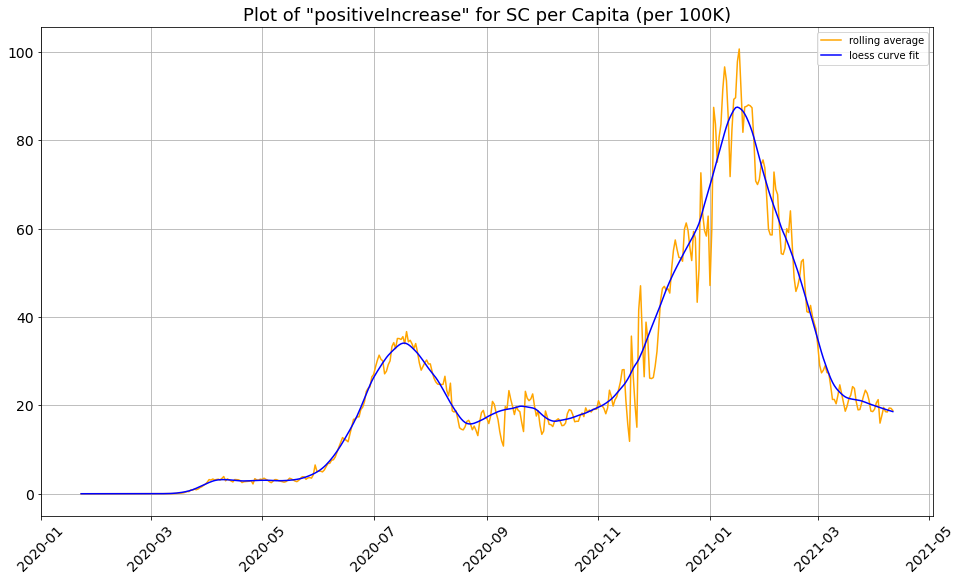

In [35]:
plot_var_perCap(var='positiveIncrease', state='SC')

In [36]:
def plot_var_perCap_compare_singleplot(var='positiveIncrease', statesList=['TX', 'FL', 'CA'], UR = 'No'):
    """
    Plots a curve fit of the given variable.
    Parameters:
    var: positiveIncrease, or deathIncrease.
    statesList: A list of the abreviations of states.
    UR: Plot unemployment rate for the list of states? Yes or No.
    """
    assert type(var)==str, "Expected string as the variable name"
    
    index = 0
    colorList = ['black','red','green','blue','orange','brown','grey','cyan','tan', 'magenta']
    umax = []
    
    fig, ax1 = plt.subplots(figsize=(16,9))
    if UR == 'Yes':
        ax2 = ax1.twinx()
        for tl in ax2.get_yticklabels():
            tl.set_color('black')         
        ax2.set_ylabel("unemployment rate",color='black', rotation=270)        
#         ax2.tick_params(axis ='y')    
   
    plt.title("Plot of \"{}\" per Capita (per 100K)".format(var),fontsize=18)    
    for state in statesList:
        index = index + 1
        s = dfStatesPop.at[0,state]
        print('s=', s)
        
        if UR == 'Yes':
            umax.append(dfSUR[state].UR.max())
            y2 = dfSUR[state].UR.max()
            x2 = dfSUR[state].loc[dfSUR[state]['UR'] == y2].index[0] # note that dfSUR is a dict of dataframes
            y2 = y2-1  # off the chart at the top.. so lower the text
        
        
        if var == 'deathIncrease':
            y = dfD[state]*100000/s
            x = dfD[state].index
        else:
            y = dfP[state]*100000/s
            x = dfP[state].index
            
        Dy = pd.DataFrame(y)
        Dy.loc[:] = Dy.loc[:].ewm(span=7, adjust=False).mean()
    #     Dy.loc[:] = Dy.loc[:].rolling(window=5).mean()  # Note.. need to drop NaN numbers
        #convert Dy dataframe to series
        Dfy = Dy.squeeze()

        df_loess = pd.DataFrame(lowess(Dfy, np.arange(len(Dfy)), frac=0.10)[:, 1], index=x, columns=[var])
        mx = df_loess.max()

        if state in MandStateDates:
            MaskDate = MandStateDates.get(state)
            ax1.vlines(MaskDate, color=colorList[index-1], ymin=0, ymax=mx, linestyle=(0, (5, 10)), \
                       linewidth=2.0, label="\"{}\" mask mandate".format(state))  
        
        if state in RescindMandStateDates:
            UnMaskDate = RescindMandStateDates.get(state)
            ax1.vlines(UnMaskDate, color=colorList[index-1], ymin=0, ymax=mx, linestyle="dotted", linewidth=2.5,\
                       label="\"{}\" End mandate".format(state))  
            
        ax1.plot(x, df_loess, color=colorList[index-1], label=state, linewidth=2.5) 

        if UR == 'Yes':
            ax2.plot(dfSUR[state].index, dfSUR[state].UR, color=colorList[index-1], linestyle="dashdot", linewidth=1.5)
            ax2.annotate("\"{}\" unemployment".format(state), xy=(x2,y2), color=colorList[index-1])
    if UR == 'Yes':
        ax2.set_ylim(0, max(umax))    
    ax1.grid(True)
    fig.legend(loc='upper left', borderaxespad=4.0)
    fig.tight_layout()
    plt.show()

s= 1952000
s= 896581
s= 2105000
s= 7520100


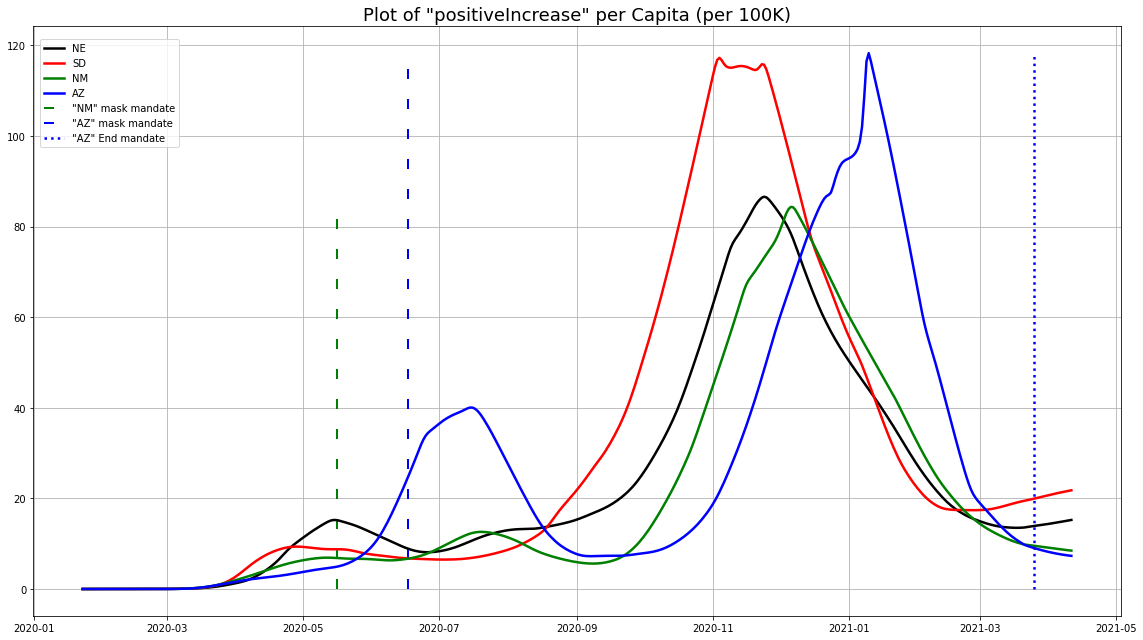

In [37]:
list_of_states_to_compare = ['NE','SD','NM', 'AZ']
plot_var_perCap_compare_singleplot(var='positiveIncrease', statesList=list_of_states_to_compare, UR = 'No')

s= 1952000
s= 896581
s= 2105000
s= 7520100


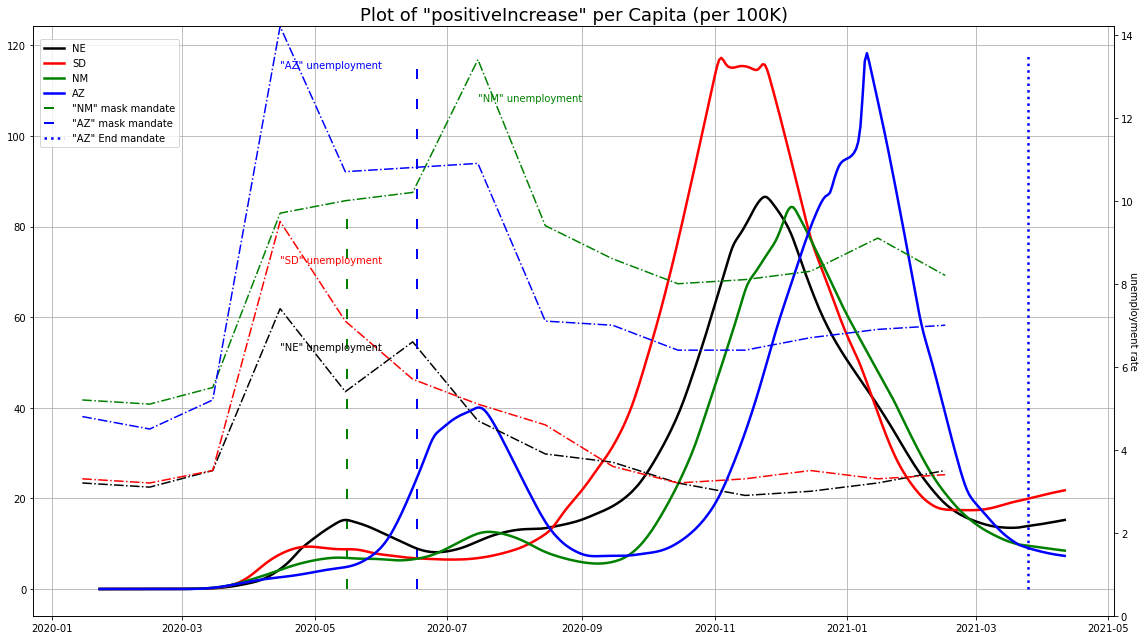

In [38]:
list_of_states_to_compare = ['NE','SD','NM', 'AZ']
plot_var_perCap_compare_singleplot(var='positiveIncrease', statesList=list_of_states_to_compare, UR = 'Yes')

s= 29730300
s= 21944600
s= 39613500
s= 8874520
s= 19300000


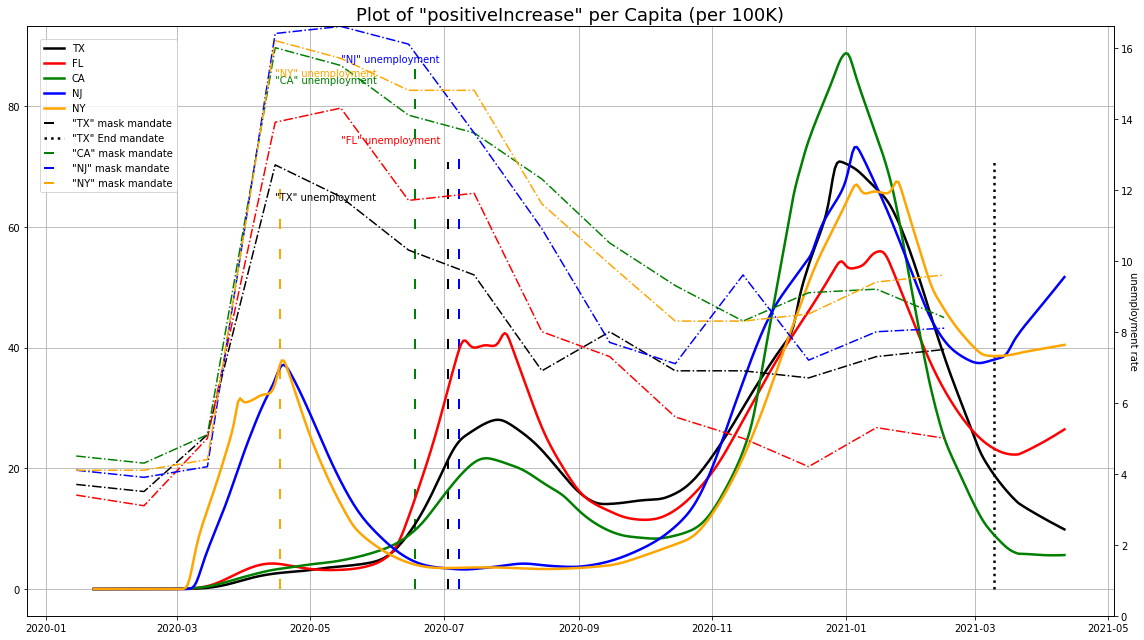

In [39]:
list_of_states_to_compare = ['TX','FL','CA','NJ','NY']
plot_var_perCap_compare_singleplot(var='positiveIncrease', statesList=list_of_states_to_compare, UR='Yes')

### MI Governor Whitmer: "We are seeing a surge in Michigan despite the fact that we have some of the strongest policies in place, mask mandates, capacity limits, working from home." - April 11, 2021

s= 10701000
s= 11714600
s= 10830000
s= 9992430
s= 12804100


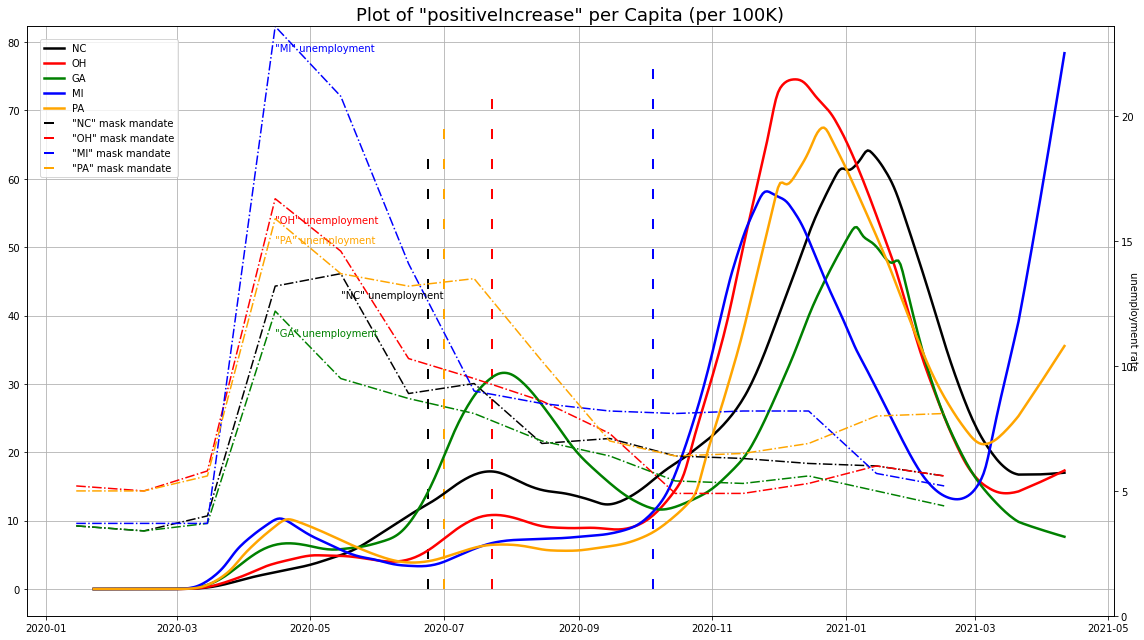

In [40]:
list_of_states_to_compare = ['NC','OH','GA','MI','PA']
plot_var_perCap_compare_singleplot(var='positiveIncrease', statesList=list_of_states_to_compare, UR = 'Yes')

s= 10701000
s= 11714600
s= 10830000
s= 9992430
s= 12804100


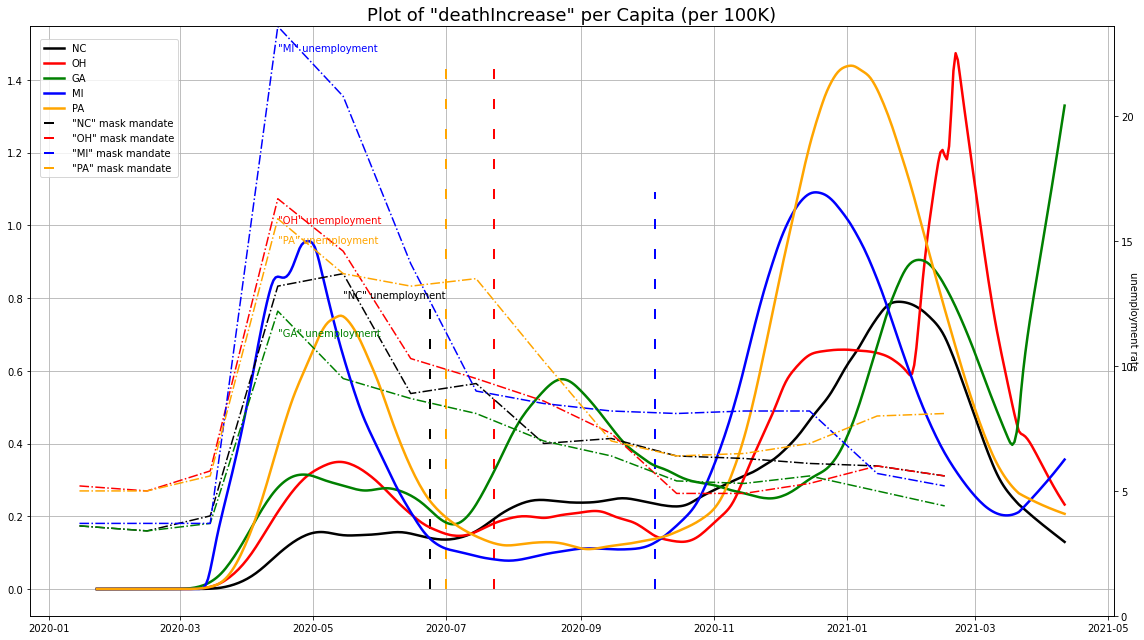

In [41]:
list_of_states_to_compare = ['NC','OH','GA','MI','PA']
plot_var_perCap_compare_singleplot(var='deathIncrease', statesList=list_of_states_to_compare, UR = 'Yes')

In [58]:
def plot_var_perCap_compare(var='both'):
    """
    Plots curve fits of the given variable or both variables for all states. Note that if "both 
    is chosen, plots will be on seperate axis' for a good visual comparison.
    Parameters:
    var: positiveIncrease, or deathIncrease, or both.
    """
    assert type(var)==str, "Expected string as the variable name"
    vars = ['posIncrease','deathIncrease']
    
    # subplot index to get the correct number of subplots
    si = int(len(statesPOP)/3)
    index = 0
    fig = plt.figure(figsize=(16,55))
    
    for state in dfStatesPop:
        index = index + 1
        ax1 = fig.add_subplot(si,3,index)
        ax2 = ax1.twinx()
        s = dfStatesPop.at[0,state]
        if var =='both':
            x = dfD[state].index
            for i in vars:
                if i == 'posIncrease':
                    y1 = dfP[state]*100000/s
                else:
                    y2 = dfD[state]*100000/s
            Dy1 = pd.DataFrame(y1)
            Dy2 = pd.DataFrame(y2)
            Dy1.loc[:] = Dy1.loc[:].ewm(span=7, adjust=False).mean()
        #     Dy1.loc[:] = Dy1.loc[:].rolling(window=5).mean()
            Dy2.loc[:] = Dy2.loc[:].ewm(span=7, adjust=False).mean()
        #     Dy2.loc[:] = Dy2.loc[:].rolling(window=5).mean()
            #convert Dy dataframe to series
            Dfy1 = Dy1.squeeze()
            Dfy2 = Dy2.squeeze()
            df1_loess = pd.DataFrame(lowess(Dfy1, np.arange(len(Dfy1)), frac=0.10)[:, 1], index=x, columns=[var])
            df2_loess = pd.DataFrame(lowess(Dfy2, np.arange(len(Dfy2)), frac=0.10)[:, 1], index=x, columns=[var])
            mx = df2_loess.max()
            f1 = ax1.plot(x, df1_loess, color='blue', label="pos increase")
            ax1.legend()
            f2 = ax2.plot(x, df2_loess, color='red', label="death increase")            
            ax2.legend(loc='center left')  
        else:
            x = dfD[state].index
            if var == 'deathIncrease':
                y = dfD[state]*100000/s
            else:
                y = dfP[state]*100000/s 
            Dy = pd.DataFrame(y)
            Dy.loc[:] = Dy.loc[:].ewm(span=7, adjust=False).mean()
            Dfy = Dy.squeeze()                
            if var == 'deathIncrease':    
                df1_loess = pd.DataFrame(lowess(Dfy,np.arange(len(Dfy)),frac=0.10)[:, 1],index=x,columns=[var])
                mx = df1_loess.max()
            else:
                df2_loess = pd.DataFrame(lowess(Dfy,np.arange(len(Dfy)),frac=0.10)[:, 1],index=x,columns=[var]) 
                mx = df2_loess.max()  #posIncrease always higher than death Increase
            
            plt.subplot(si,3,index)                

        if state in MandStateDates:
            MaskDate = MandStateDates.get(state)
            plt.vlines(MaskDate, color="black", ymin=0, ymax=mx, linestyle="--", label="mask mandate") 

        if state in RescindMandStateDates:
            UnMaskDate = RescindMandStateDates.get(state)
            plt.vlines(UnMaskDate, color="green", ymin=0, ymax=mx, linestyle="dotted", linewidth=2.5,\
                       label="End mandate")           
                
        if var == 'posIncrease':
            plt.plot(x, df2_loess, color='blue', label="positive increase")
        elif var == 'deathIncrease':
            plt.plot(x, df1_loess, color='red', label="death increase")
        if var =='both':
            plt.title("positives vs. death for {} per 100K".format(state))
        else:
            plt.title("\"{}\" for {} per 100K".format(var,state))

        plt.grid(True)
        plt.legend()
        plt.xticks(rotation=45)            
            
    fig.tight_layout()
    plt.show()

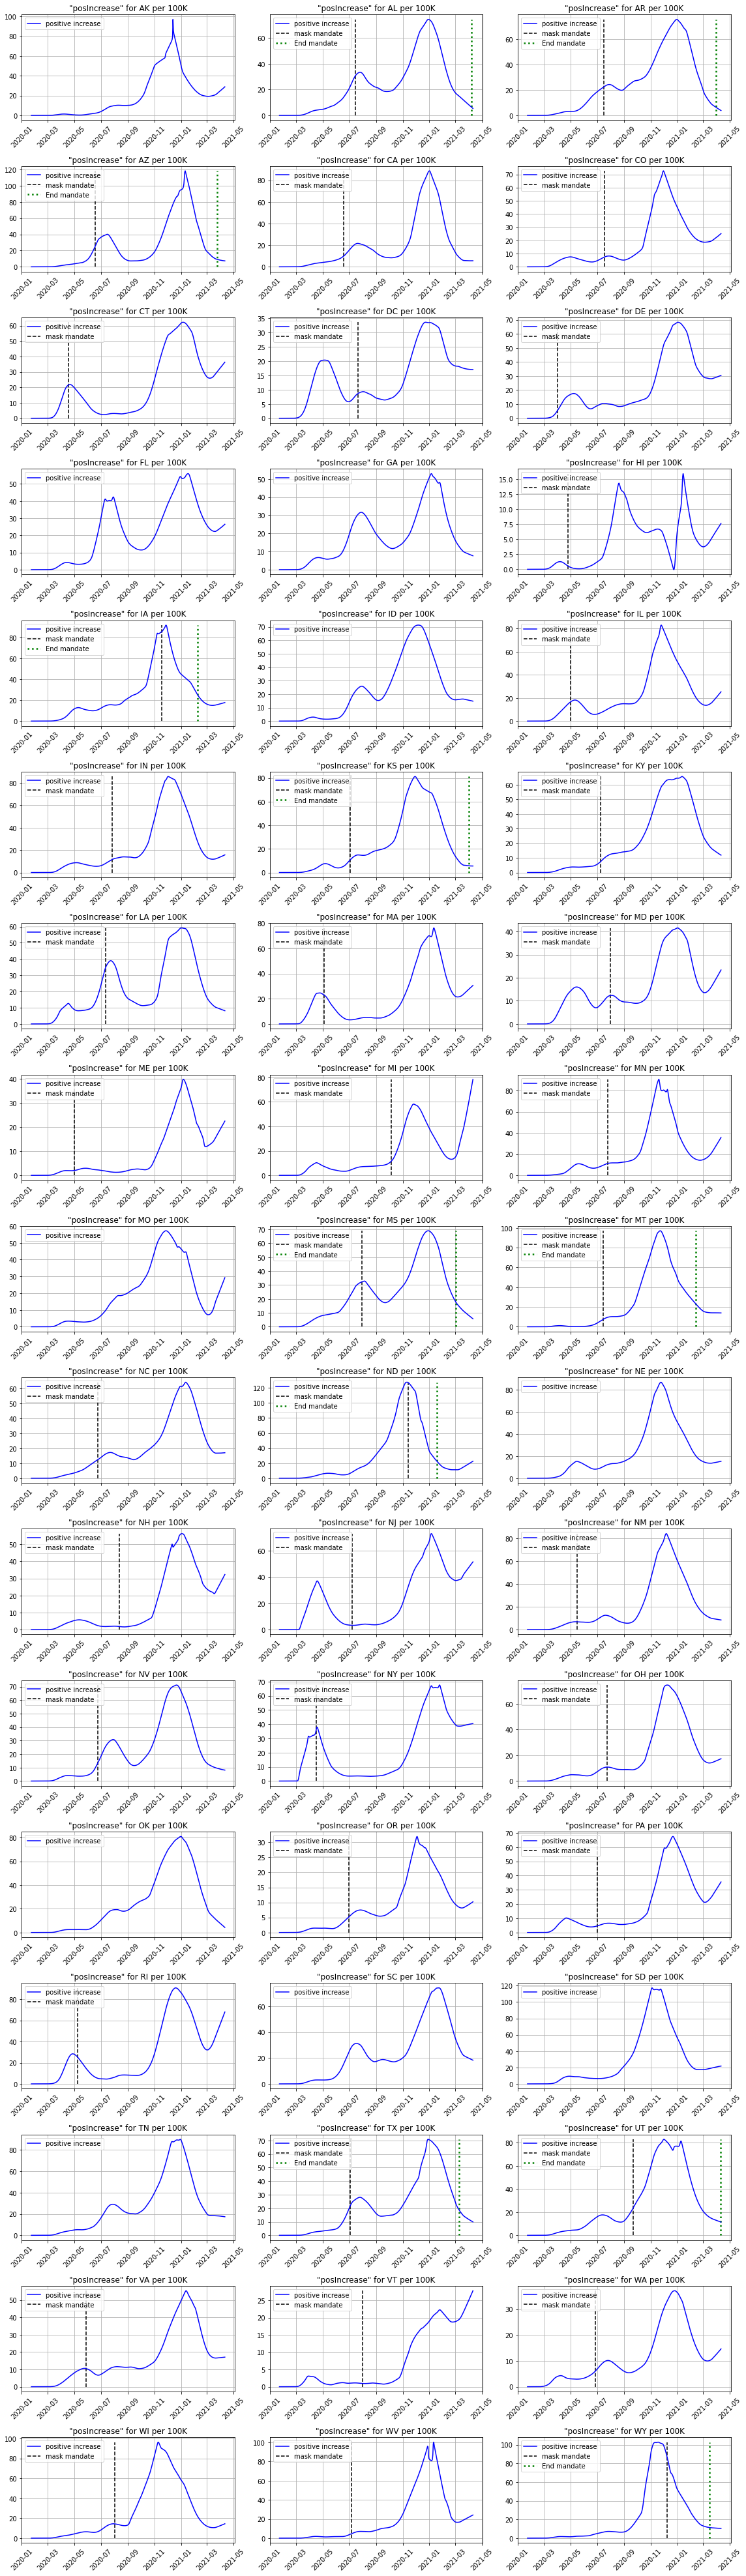

In [43]:
plot_var_perCap_compare('posIncrease')

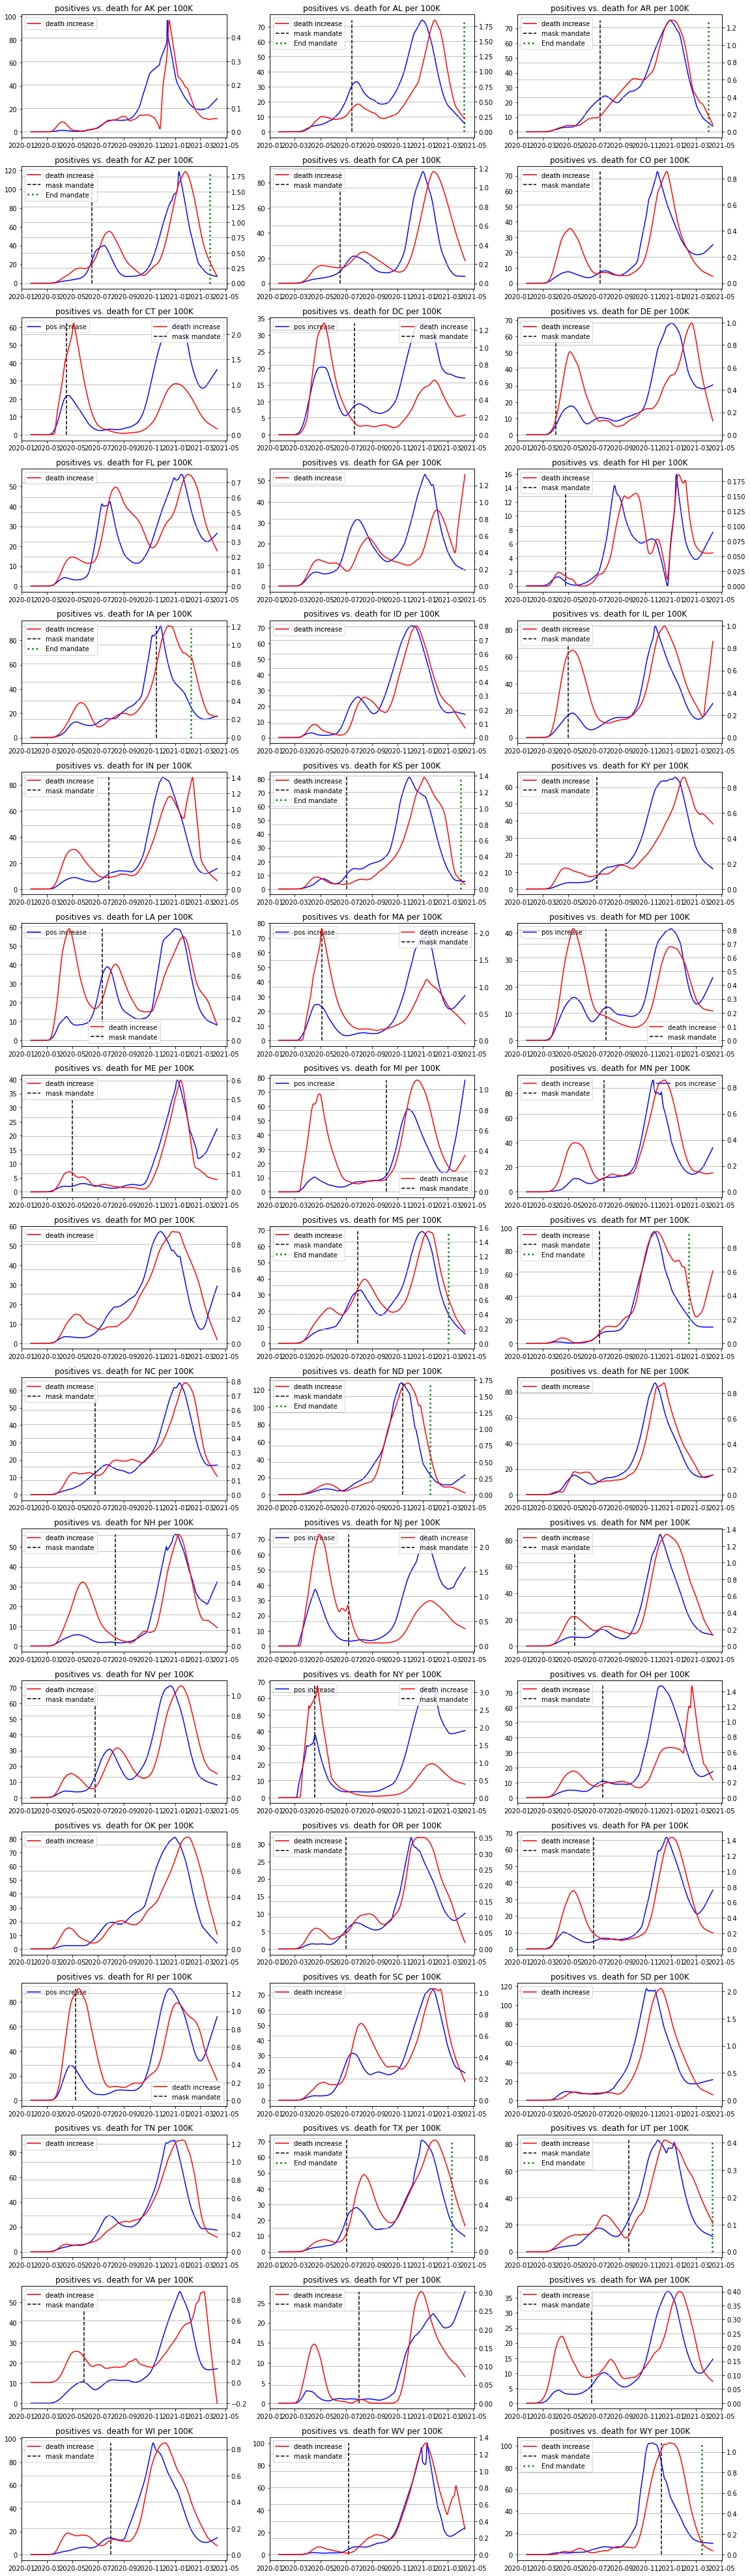

In [59]:
plot_var_perCap_compare('both')

In [45]:
def plot_perCap_compare():
    """
    Plots curve fits of positiveIncrease, and deathIncrease for all states on a single axis.
    Parameters: none
    """
    vars = ['posIncrease','deathIncrease']    
    
    # subplot index to get the correct number of subplots
    si = int(len(statesPOP)/3)
            
    index = 0
    plt.figure(figsize=(16,55))
    
    for state in dfStatesPop:
        index = index + 1
        s = dfStatesPop.at[0,state]
#         print('s=', s)
        for var in vars:
            if var == 'deathIncrease':
                y = dfD[state]*100000/s
                x1 = dfD[state].index
            else:
                y = dfP[state]*100000/s
                x2 = dfP[state].index

            Dy = pd.DataFrame(y)
            Dy.loc[:] = Dy.loc[:].ewm(span=7, adjust=False).mean()
        #     Dy.loc[:] = Dy.loc[:].rolling(window=5).mean()
            #convert Dy dataframe to series
            Dfy = Dy.squeeze()
            
            Dy = pd.DataFrame(y)
            Dy.loc[:] = Dy.loc[:].ewm(span=7, adjust=False).mean()
        #     Dy.loc[:] = Dy.loc[:].rolling(window=5).mean()
            #convert Dy dataframe to series
            Dfy = Dy.squeeze()            

            if var == 'deathIncrease':
                df1_loess = pd.DataFrame(lowess(Dfy,np.arange(len(Dfy)),frac=0.10)[:, 1],index=x1,columns=[var])
            else:
                df2_loess = pd.DataFrame(lowess(Dfy,np.arange(len(Dfy)),frac=0.10)[:, 1],index=x2,columns=[var]) 
            
            mx = df2_loess.max()
    #         plt.title("Plot of \"{}\" for {} per Capita (per 10K)".format(var,state))
            plt.subplot(si,3,index)
    #         plt.bar(x=x,height=y,edgecolor='tan',color='beige')
    #         plt.plot(x,Dy, color='red')

        if state in MandStateDates:
            MaskDate = MandStateDates.get(state)
            plt.vlines(MaskDate, color="black", ymin=0, ymax=mx, linestyle="--", label="mask mandate") 
            
        if state in RescindMandStateDates:
            UnMaskDate = RescindMandStateDates.get(state)
            plt.vlines(UnMaskDate, color="green", ymin=0, ymax=mx, linestyle="dotted", linewidth=2.5,\
                       label="End mandate")           

        plt.plot(x1, df1_loess, color='red', label="death increase")
        plt.plot(x2, df2_loess, color='blue', label="positive increase")
        plt.grid(True)
        plt.legend()
        plt.xticks(rotation=45)
#         plt.yticks(fontsize=14)
        plt.title("positives vs. death for {} per 100K".format(state))

    plt.tight_layout()
    plt.show()

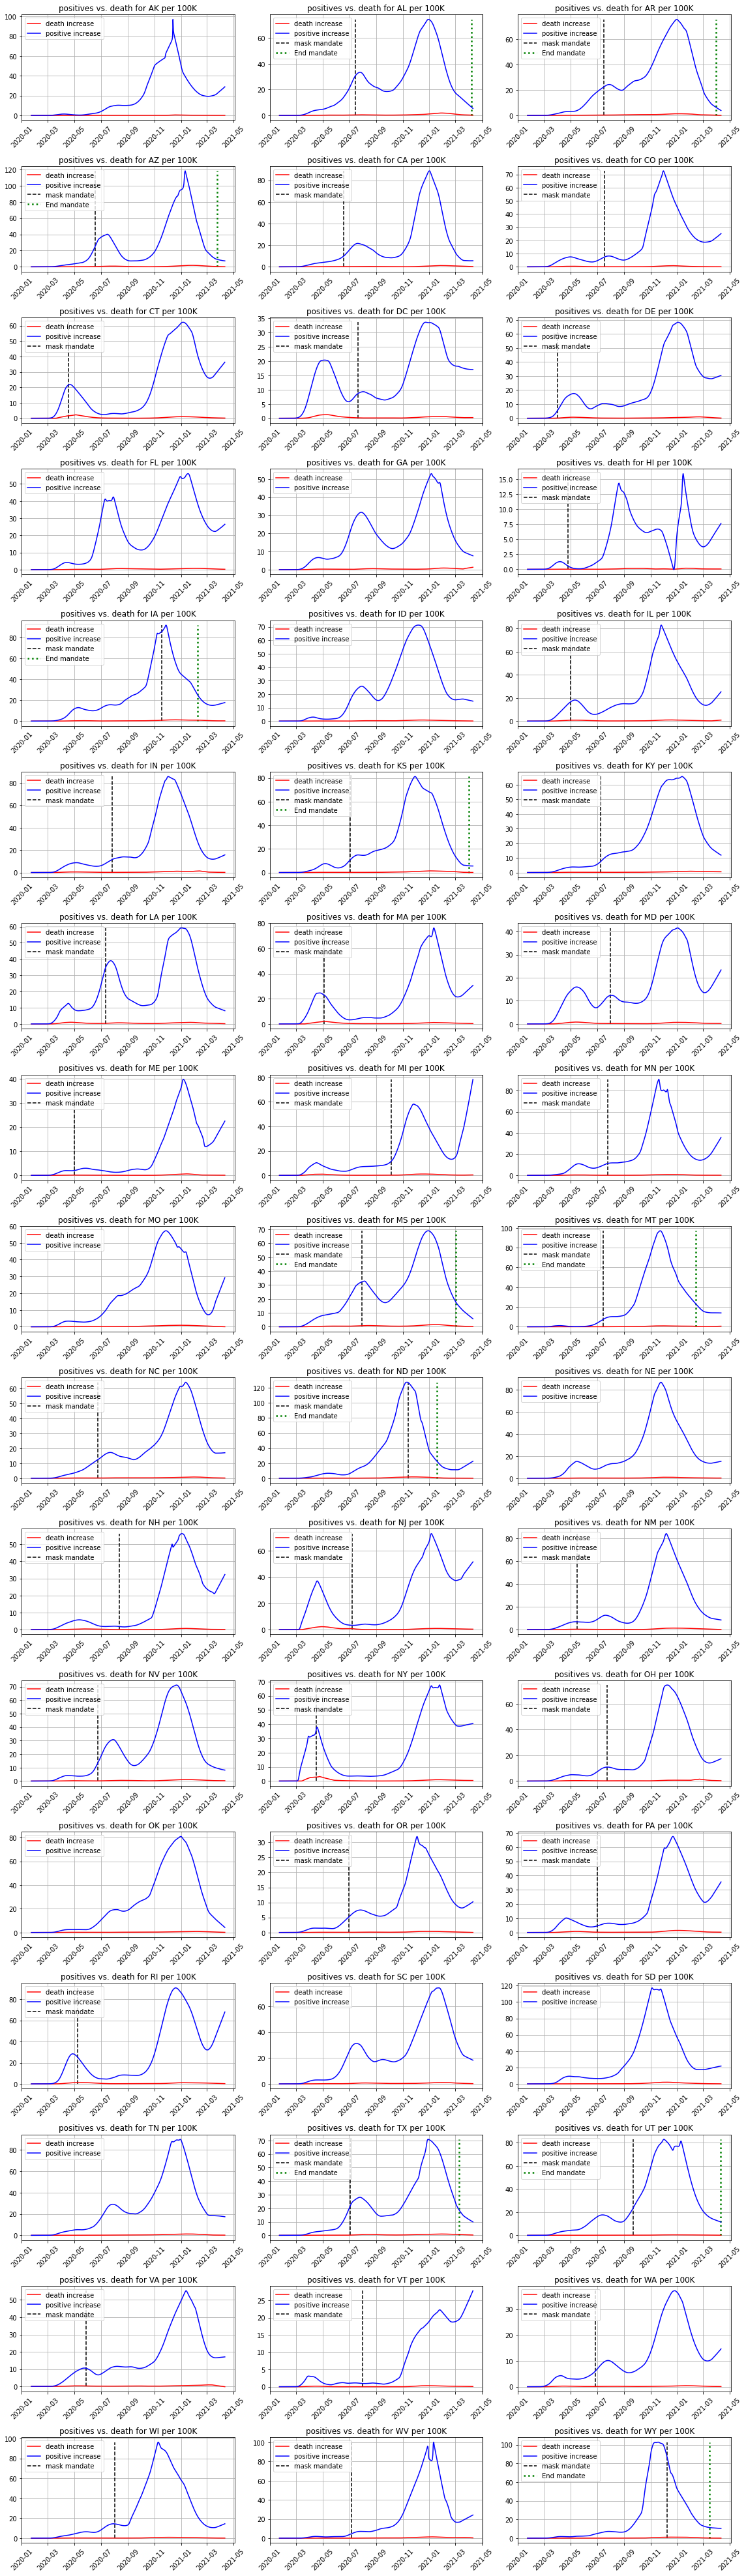

In [46]:
plot_perCap_compare()

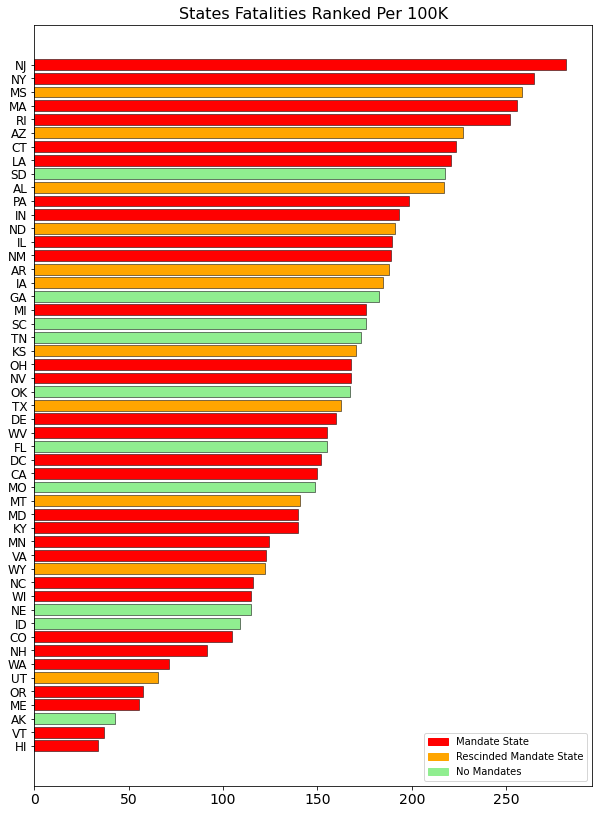

In [47]:
"""
State Fatalities per 100K.. Ranked!
Plots horiz bar chart of state fatalities per 100K population.
"""
fatalities,x = [],[]

plt.figure(figsize=(10,14))
plt.title("States Fatalities Ranked Per 100K",fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)

# for s in states:
for state in dfStatesPop:
    s = dfStatesPop.at[0,state]
    d = dfD[state].sum()*100000/s 
    fatalities.append(d)
    x.append(state)
    
dfH = pd.DataFrame ({'fatalities': fatalities, 'state': x})
# print(dfH)
# Sort the table
dfH = dfH.sort_values(by=['fatalities'])
bar = dfH.values
# print(type(bar))
# print(bar)
# print(type(dfH))
# print(dfH.head(20))

for i in range(len(bar)):
#     bar_color = 'orange' if dfH.state in MandStateDates else 'blue'
    if bar[i][1] in MandStateDates:
        bar_color = 'red'
        lab = "Mandate"
    if bar[i][1] in RescindMandStates:
        bar_color = 'orange'
        lab = "Rescinded Mandate"
    if bar[i][1] in NoMandStates:
        bar_color = 'lightgreen'
        lab = "No Mandate"        
    plt.barh(y=bar[i][1], width=bar[i][0], color=bar_color, edgecolor='k',linewidth=.5, label=lab);
    
Mand = mpatches.Patch(color='red', label='Mandate State')
RescindMand = mpatches.Patch(color='orange', label='Rescinded Mandate State')
NoMand = mpatches.Patch(color='lightgreen', label='No Mandates')
plt.legend(handles=[Mand, RescindMand, NoMand])
plt.show()

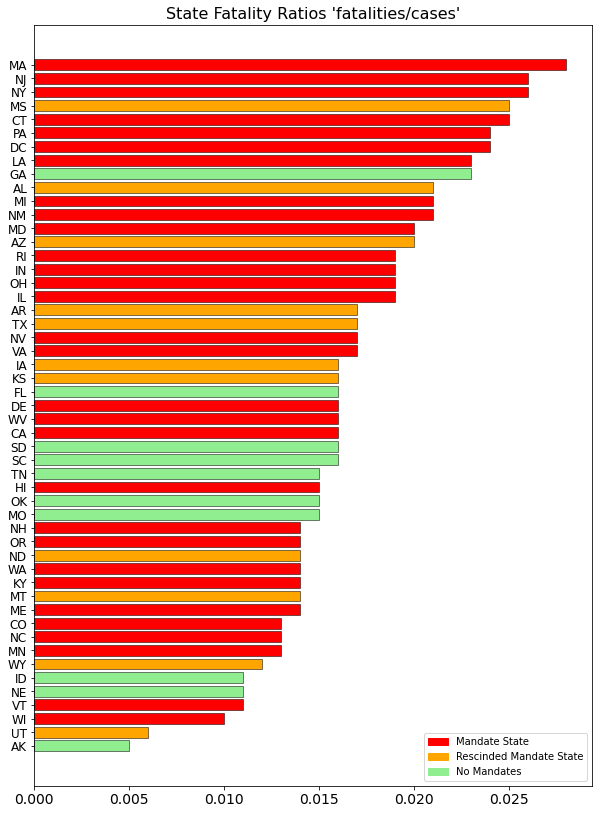

In [48]:
"""
State Fatality Ratios.. Ranked!
Plots horiz bar chart of state fatality ratios. For example, of those who got sick in a particular state,
what was the percentage that died. "Fatalities / Positives cases"
"""
fr,x = [],[]

plt.figure(figsize=(10,14))
plt.title("State Fatality Ratios 'fatalities/cases'",fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)

# for s in states:
for s in AllStates:
    d = float(dfD[s].sum())
    p = float(dfP[s].sum())
    fr.append(round(d/p,3))
    x.append(s)
    
dfH = pd.DataFrame ({'ratio': fr, 'state': x})
# Sort the table
dfH = dfH.sort_values(by=['ratio'])
bar = dfH.values
# print(type(bar))
# print(bar)
# print(type(dfH))
# print(dfH.head(20))

for i in range(len(bar)):
#     bar_color = 'orange' if dfH.state in MandStateDates else 'blue'
    if bar[i][1] in MandStateDates:
        bar_color = 'red'
        lab = "Mandate"
    if bar[i][1] in RescindMandStates:
        bar_color = 'orange'
        lab = "Rescinded Mandate"
    if bar[i][1] in NoMandStates:
        bar_color = 'lightgreen'
        lab = "No Mandate"        
    plt.barh(y=bar[i][1], width=bar[i][0], color=bar_color, edgecolor='k',linewidth=.5, label=lab);
    
Mand = mpatches.Patch(color='red', label='Mandate State')
RescindMand = mpatches.Patch(color='orange', label='Rescinded Mandate State')
NoMand = mpatches.Patch(color='lightgreen', label='No Mandates')
plt.legend(handles=[Mand, RescindMand, NoMand])
plt.show()

In [49]:
dfD["Mandate_States"] = dfD.loc[:,MandStates].sum(axis=1)
dfD["NoMandate_States"] = dfD.loc[:,NoMandStates].sum(axis=1)
dfP["Mandate_States"] = dfP.loc[:,MandStates].sum(axis=1)
dfP["NoMandate_States"] = dfP.loc[:,NoMandStates].sum(axis=1)
pprint(NoMandStates)

['SD', 'OK', 'ID', 'AK', 'GA', 'MO', 'NE', 'SC', 'TN', 'FL']


In [50]:
dfSumP = dfP[['Mandate_States', 'NoMandate_States']].copy()
dfSumD = dfD[['Mandate_States', 'NoMandate_States']].copy()
dfSumP

State       Mandate_States  NoMandate_States
2020-01-23             0.0               0.0
2020-01-24             1.0               0.0
2020-01-25             0.0               0.0
2020-01-26             3.0               0.0
2020-01-27             1.0               0.0
...                    ...               ...
2021-04-07         66109.0           11544.0
2021-04-08         61319.0           13159.0
2021-04-09         67521.0           13372.0
2021-04-10         56363.0            9846.0
2021-04-11         37225.0            8177.0

[445 rows x 2 columns]

In [51]:
dfpop = dfStatesPop.copy()
dfpop["Mandate_States"] = dfpop.loc[:,MandStates].sum(axis=1)
dfpop["NoMandate_States"] = dfpop.loc[:,NoMandStates].sum(axis=1)

In [52]:
Man = dfpop.iloc[0]['Mandate_States']
NoMan = dfpop.iloc[0]['NoMandate_States']
print("Population of States with Mandates = ", Man)
print("Population of States without Mandates = ", NoMan)
print("Total US population = ", Man + NoMan)

Population of States with Mandates =  270754259
Population of States without Mandates =  60589228
Total US population =  331343487


In [53]:
dfSumP['Mandate_States'] = (100000 * dfSumP['Mandate_States']/Man).astype(float) 
dfSumP['NoMandate_States'] = (100000 * dfSumP['NoMandate_States']/NoMan).astype(float)
dfSumD['Mandate_States'] = (100000 * dfSumD['Mandate_States']/Man).astype(float) 
dfSumD['NoMandate_States'] = (100000 * dfSumD['NoMandate_States']/NoMan).astype(float)
timefmt = "%Y-%m-%d" 
# df['Date_Time'] = pd.to_datetime(df['Date_Time'], format = timefmt, errors='coerce')
# dfSum.index = pd.to_datetime(dfSum['Date'], format = timefmt, errors='coerce' )
dfSumP.tail(10)

State       Mandate_States  NoMandate_States
2021-04-02       20.363115         19.208035
2021-04-03       20.875018         14.342483
2021-04-04       10.801307          9.993526
2021-04-05       21.638441         16.273520
2021-04-06       21.371040         19.807151
2021-04-07       24.416606         19.052892
2021-04-08       22.647474         21.718382
2021-04-09       24.938112         22.069930
2021-04-10       20.817032         16.250413
2021-04-11       13.748630         13.495798

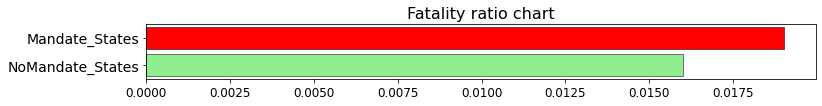

In [54]:
"""
Mandate vs. Non-Mandate states Fatality Ratios.
Plots horiz bar chart of state fatality ratios for the collection of Mandate States vs. Non-Mandate States
"""
states = ['Mandate_States', 'NoMandate_States']

fr,x = [],[]
for s in states:
    d = float(dfSumD[s].sum())
    p = float(dfSumP[s].sum())
    fr.append(round(d/p,3))
    x.append(s)
    
dfH = pd.DataFrame ({'ratio': fr, 'state': x})
# Sort the table
dfH = dfH.sort_values(by=['ratio'])

plt.figure(figsize=(12,1))
plt.title("Fatality ratio chart",fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
# plt.barh(y=dfH.state, width=dfH.ratio, color='red', edgecolor='k',linewidth=.5);

bar = dfH.values
# print(type(bar))
# print(bar)
# print(type(dfH))
# print(dfH.head(20))

for i in range(len(bar)):
#     bar_color = 'orange' if dfH.state in MandStateDates else 'blue'
    if bar[i][1] == 'NoMandate_States':
        bar_color = 'lightgreen'
        lab = "No Mandate"
    else:
        bar_color = 'red'
        lab = "Mandate"        
    plt.barh(y=bar[i][1], width=bar[i][0], color=bar_color, edgecolor='k',linewidth=.5, label=lab);
    
# Mand = mpatches.Patch(color='red', label='Mandate State')
# NoMand = mpatches.Patch(color='lightgreen', label='No Mandates')
# plt.legend(handles=[Mand, NoMand]) 

plt.show()

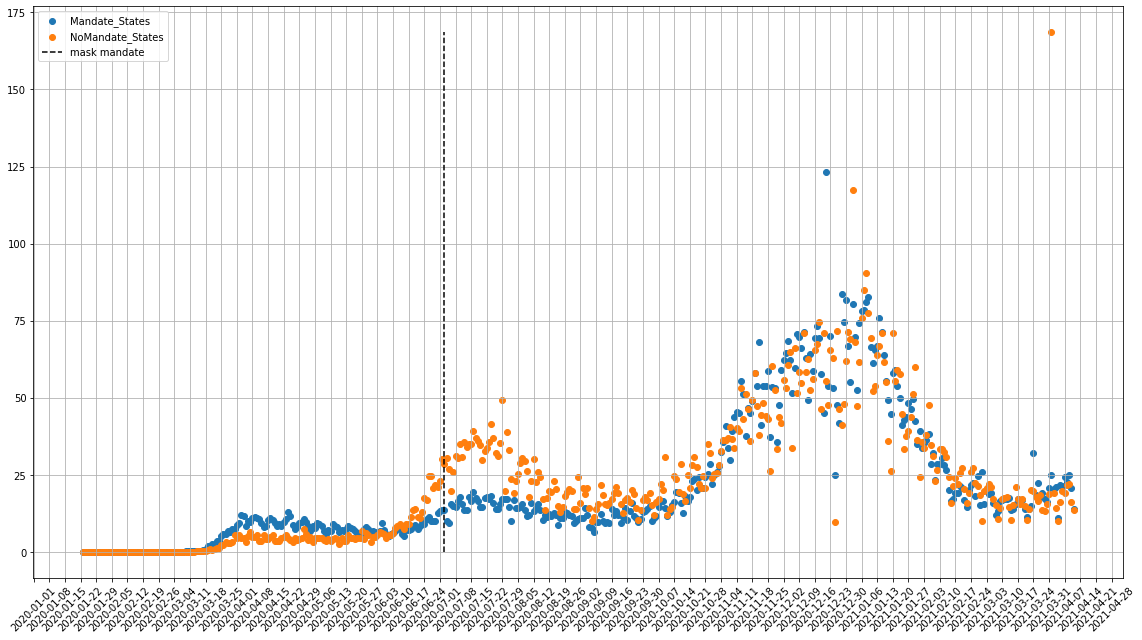

In [55]:
plt.figure(figsize=(16,9))
l = []
for column in dfSumP:
    y = dfSumP[column]
    x = dfSumP.index
    l.append(dfSumP[column].max())
    plt.scatter(x, y, label=column)    
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))
    plt.xticks(rotation=45)
#         plt.yticks(fontsize=14)
#     plt.title("\"{}\" for {}".format(var,state))
mx = max(l)
Dat = "2020-07-03"
MaskDate = datetime.strptime(Dat, '%Y-%m-%d')
plt.vlines(MaskDate, color="black", ymin=0, ymax=mx, linestyle="--", label="mask mandate") 
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

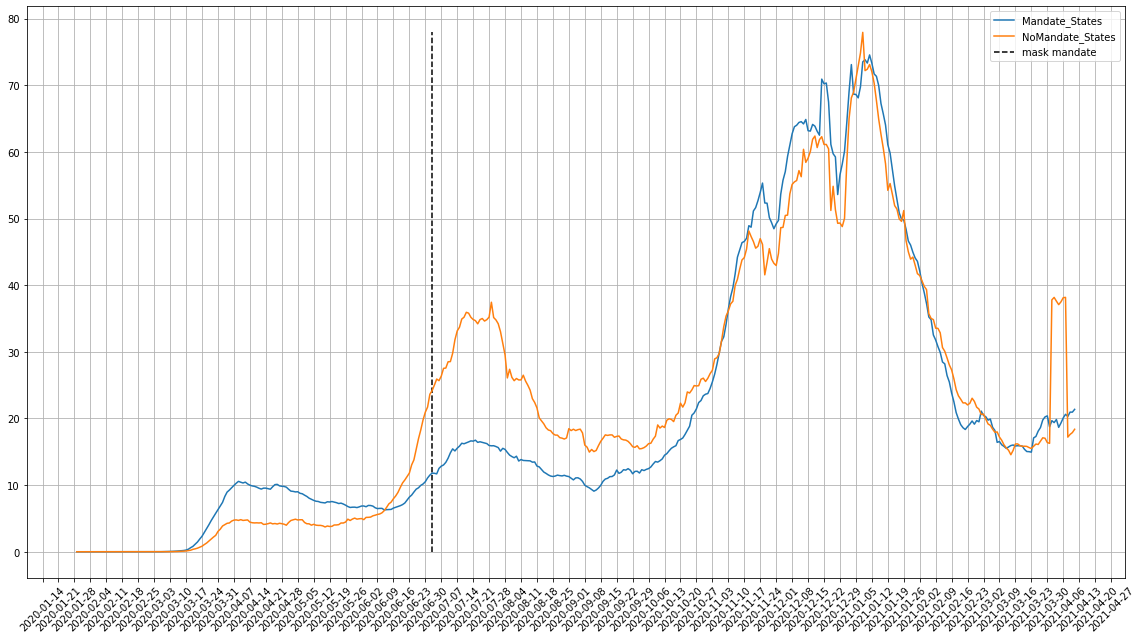

In [56]:
plt.figure(figsize=(16,9))
l = []
for column in dfSumP:
    y = dfSumP[column]
    x = dfSumP.index
    Dy = pd.DataFrame(y)
#     Dy.loc[:] = Dy.loc[:].ewm(span=7, adjust=False).mean() 
    Dy.loc[:] = Dy.loc[:].rolling(window=7).mean()
    l.append(Dy[column].max())
    plt.plot(Dy, label=column)       
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))
    plt.xticks(rotation=45)
#         plt.yticks(fontsize=14)
#     plt.title("\"{}\" for {}".format(var,state))
mx = max(l)
Dat = "2020-07-03"
MaskDate = datetime.strptime(Dat, '%Y-%m-%d')
plt.vlines(MaskDate, color="black", ymin=0, ymax=mx, linestyle="--", label="mask mandate") 
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [57]:
d = 4161167
p = 539723-263147
x = p/d *100
print(x)

6.646596976280933
